1. IMPORT AND INSTALL DEPENDENCIES

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib nltk gtts pyttsx3


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\franc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. KEYPOINTS USING MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(48,206,117), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(48,164,88), thickness=1, circle_radius=1)
                             )
    #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,220), thickness=2, circle_radius=2)
                             ) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,0), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,90,230), thickness=2, circle_radius=2)
                             ) 
#draw right hand connections

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

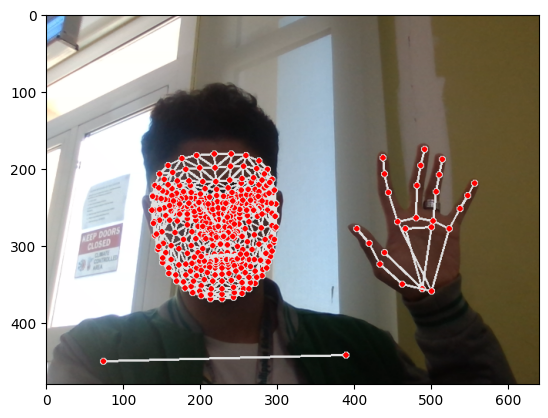

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. IMPORT AND INSTALL DEPENDENCIES

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.34964305,  0.57400417, -1.14990139, ...,  0.        ,
        0.        ,  0.        ])

4. SETUP FOLDERS FOR COLLECTION

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['-', 'hello', 'how are you', 'thank you', 'im fine','nice to meet you','yes', 'no', 'im sorry'])

# 30 videos worth of data
no_sequences = 90

#Videos are going to be 30 frames in length
sequence_length = 30

#Folder start
start_folder = 0

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [32]:
cap.release()
cv2.destroyAllWindows()

6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(810, 30, 1662)

In [34]:
X = np.array(sequences)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [83]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [84]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [86]:
res = [0.7, 0.2, 0.1]

In [88]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [136]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
6/6 [==============================] - 1s 91ms/step - loss: 0.2709 - categorical_accuracy: 0.8956 - val_loss: 2.0168 - val_categorical_accuracy: 0.5854
Epoch 2/20
6/6 [==============================] - 0s 82ms/step - loss: 0.2744 - categorical_accuracy: 0.8819 - val_loss: 1.0774 - val_categorical_accuracy: 0.6098
Epoch 3/20
6/6 [==============================] - 0s 83ms/step - loss: 0.2441 - categorical_accuracy: 0.9121 - val_loss: 1.7904 - val_categorical_accuracy: 0.6829
Epoch 4/20
6/6 [==============================] - 1s 89ms/step - loss: 0.1819 - categorical_accuracy: 0.9313 - val_loss: 0.8461 - val_categorical_accuracy: 0.6829
Epoch 5/20
6/6 [==============================] - 1s 119ms/step - loss: 0.1749 - categorical_accuracy: 0.9341 - val_loss: 1.5651 - val_categorical_accuracy: 0.6341
Epoch 6/20
6/6 [==============================] - 1s 143ms/step - loss: 0.1686 - categorical_accuracy: 0.9478 - val_loss: 1.0787 - val_categorical_accuracy: 0.6585
Epoch 7/20
6/6 [====

KeyboardInterrupt: 

In [137]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 9)                 297       
                                                                 
Total params: 596873 (2.28 MB)
Trainable params: 59687

8. MAKE PREDICTIONS

In [138]:
res = model.predict(X_test)

13/13 [==============================] - 0s 20ms/step


9. SAVE WEIGHTS

In [142]:
model.save('action.h5')

In [143]:
model.load_weights('action.h5')

10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [144]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [145]:
yhat = model.predict(X_train)

13/13 [==============================] - 0s 20ms/step


In [146]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [149]:
accuracy_score(ytrue, yhat)

0.9209876543209876

11. TEST IN REAL TIME

In [150]:
import cv2
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (215, 171, 163), (222, 175, 171), (163, 50, 160), (16, 256, 216), (180, 200, 200), (200, 200, 200)]
count = 0
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    if isinstance(res, float):
        res = [res]  # Convert a single probability to a list for consistency
    
    num_rectangles = min(len(res), 9)  # Display only 9 rectangles at most
    for num in range(num_rectangles):
        prob = res[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[min(num, len(actions) - 1)], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return output_frame


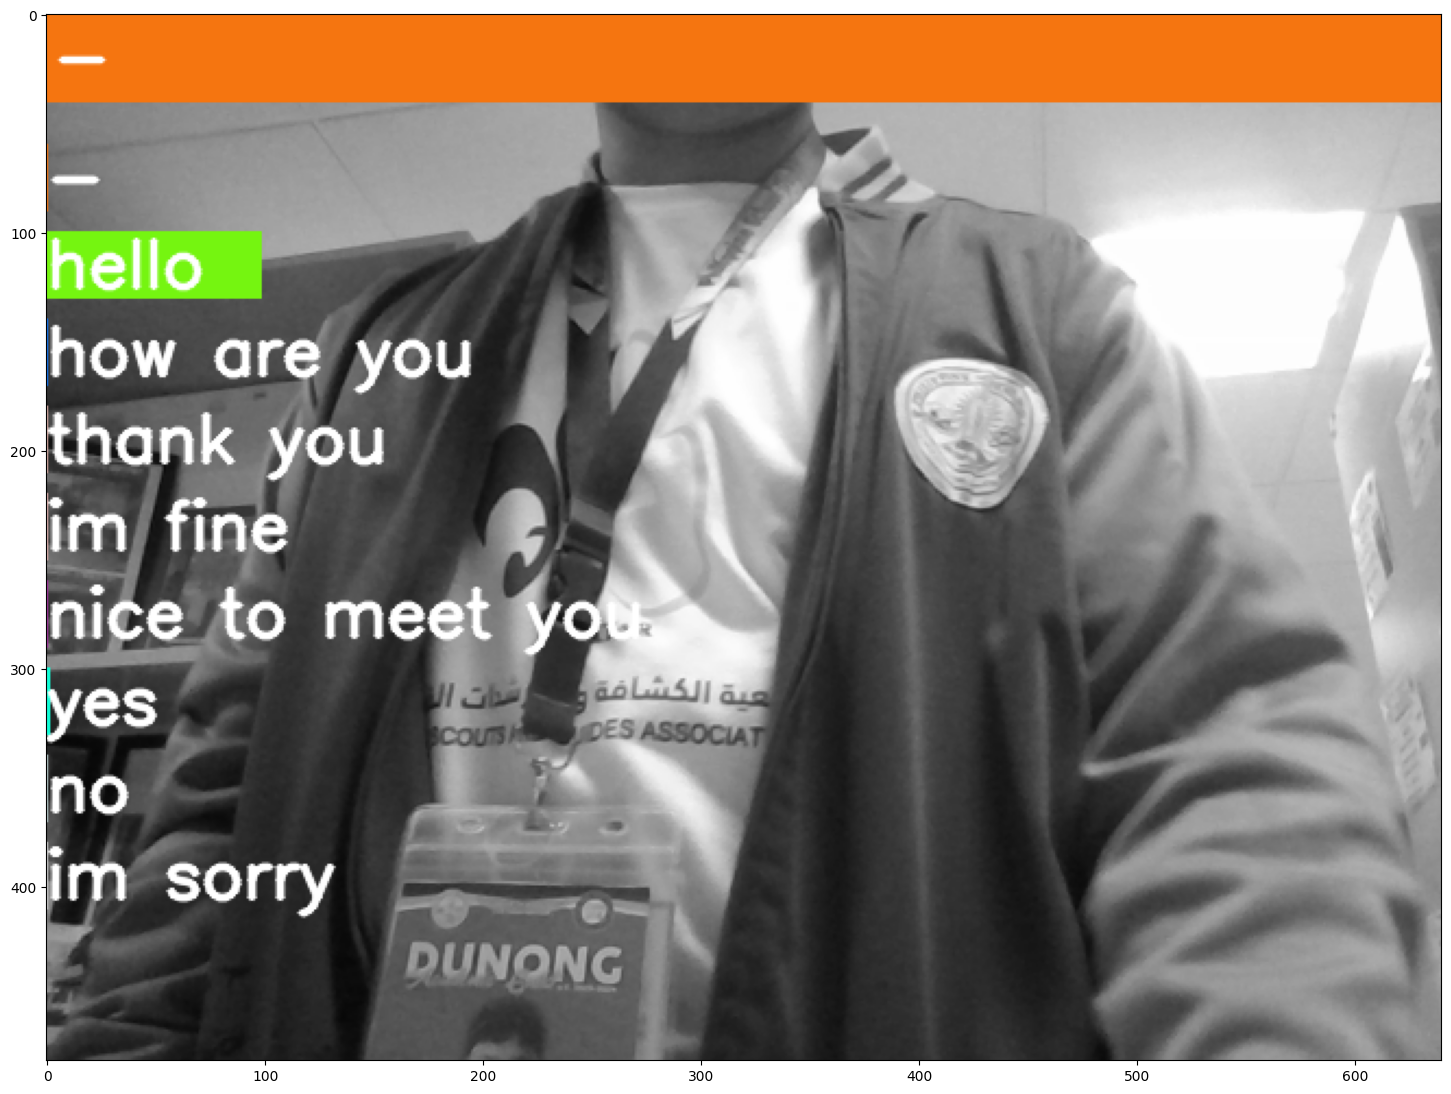

In [156]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [165]:
import cv2
import mediapipe as mp
import numpy as np
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Other variables
current_word_index = 0
words_to_display = ['-', 'hello', 'how are you', 'thank you', 'im fine', 'nice to meet you', 'yes', 'no', 'im sorry']
sequence = []
actions = np.array(['-', 'hello', 'how are you', 'thank you', 'im fine', 'nice to meet you', 'yes', 'no', 'im sorry'])
sentence = []
predictions = []
threshold = 0.75
last_action = None
last_spoken_word = None
last_spoken_time = time.time()

def text_to_speech(text):
    engine.say(text)
    engine.runAndWait()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Pre-process frame: Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.resize(gray_frame, (640, 480))

    # Perform holistic detection
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        image, results = mediapipe_detection(gray_frame, holistic)

    # Draw landmarks
    draw_styled_landmarks(image, results)

    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    # Modify your prediction logic to ensure `res` is a list of probabilities
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
        action = actions[np.argmax(res)]
        print(action)
        predictions.append(action)

        if np.unique(predictions[-10:])[0] == action:
            if res[np.argmax(res)] > threshold:
                if last_action != action:
                    sentence.append(action)
                    last_action = action

         # Check if the length of the sentence is greater than 1
        if len(sentence) > 1:
            # If true, keep only the last element in the list
            sentence = sentence[-1:]

        # Check if it's time to change the displayed word
        if current_word_index < len(words_to_display):
            text_to_display = words_to_display[current_word_index]
            current_word_index += 1

        # Visualize the probabilities and display the sentence on the OpenCV frame
        image = prob_viz(res, actions, image, colors)
        top_text_to_display = ' '.join(sentence)
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, top_text_to_display, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Text-to-speech every 5 seconds
        current_time = time.time()
        if current_time - last_spoken_time >= 2:
            last_spoken_time = current_time
            # Say the top predicted word if it's different from the last spoken word
            if top_text_to_display != last_spoken_word:
                last_spoken_word = top_text_to_display
                text_to_speech(top_text_to_display)

    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 33ms/step
-
1/1 [==============================] - 0s 22ms/step
-
1/1 [==============================] - 0s 16ms/step
-
1/1 [==============================] - 0s 32ms/step
-
1/1 [==============================] - 0s 32ms/step
-
1/1 [==============================] - 0s 32ms/step
-
1/1 [==============================] - 0s 38ms/step
-
1/1 [==============================] - 0s 31ms/step
-
1/1 [==============================] - 0s 32ms/step
-
1/1 [==============================] - 0s 16ms/step
-
1/1 [==============================] - 0s 31ms/step
-
1/1 [==============================] - 0s 31ms/step
-
1/1 [==============================] - 0s 32ms/step
-
1/1 [==============================] - 0s 16ms/step
-
1/1 [==============================] - 0s 24ms/step
-
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 31ms/step
hello
1/1 [==============================] - 0s 32ms/step
hello
1/1 [===========

In [65]:
cap.release()
cv2.destroyAllWindows()